機械学習特論 第5回 分類 k近傍法 MNISTの分類

In [ ]:
# google colab で実行する場合は、次の行の先頭の # を削除してこのブロックを実行する
#!pip install japanize-matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [13]:
# 手書き文字のデータセットをダウンロードして、実験用データを準備
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version=1)
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
# 処理時間の都合により、70000枚のうち7000枚を利用
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1)

e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


xの形状: (7000, 784)
yの形状: (7000,) <class 'numpy.ndarray'>
0番目のデータの形状: x[0].shape=(784,), ターゲット: y[0]=6
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 043 148 201 253 253 193 055 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 183 252 252 252 252 253 231 086 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 006 198 253 201 118 021 021 144 231 168 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 006 112 252 225 021 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 022 252 252 124 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

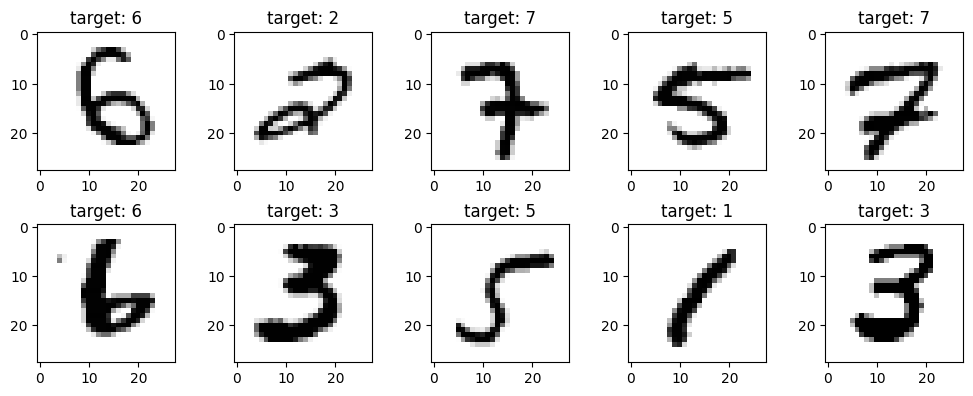

In [14]:
# ダウンロードしたデータセットを確認
print('xの形状:', x.shape)
print('yの形状:', y.shape, type(y))
print(f'0番目のデータの形状: x[0].shape={x[0].shape}, ターゲット: y[0]={y[0]}')
for i in range(28):
    for j in range(28):
        print(f'{int(x[0][i*28+j]):03}', end=' ')
    print()

# データセットに含まれる文字のイメージを表示 (5x2のレイアウトで最初の10画像)
rows, cols = 2, 5
fig, ax = plt.subplots(rows, cols, figsize=(10.0, 4.0), tight_layout=True)
for i in range(rows * cols):
    ax[i // cols][i % cols].imshow(x[i].reshape(28,28), cmap=plt.cm.gray_r)
    ax[i // cols][i % cols].set_title(f'target: {y[i]}')
plt.show()

In [15]:
# データセットに含まれる各数字の画像数を確認
for i in range(10):
    n = 0
    for j in range(len(y)):
        if i == y[j]:
            n = n + 1
    print(f'{i}: {n}, ', end='')  # 各数字の画像数にバラツキあり

# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1) # 検証用データに25%を割当て
print('\n', len(x_train), len(x_test), len(y_train), len(y_test)) # それぞれのデータ数を確認

0: 655, 1: 833, 2: 722, 3: 718, 4: 637, 5: 651, 6: 671, 7: 744, 8: 670, 9: 699, 
 5250 1750 5250 1750


In [16]:
# k近傍法のモデルを学習データを利用して学習
clf_3 = KNeighborsClassifier(n_neighbors=3, # k を指定 (デフォルトは 5)
                             weights='uniform',  # 距離を考慮しない(uniform:デフォルト)、する(distance)
                             algorithm='auto', # 近傍点計算アルゴリズム (auto:デフォルト,ball_tree,kd_tree,brute)
                             leaf_size=30,  # ball_tree,kd_tree指定時のリーフサイズの設定 (デフォルトは 30)
                             p=2)  # 距離計算の次元 (2:デフォルト、1)
clf_3 = clf_3.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

# 学習したモデルの性能(正答率)を学習用データで評価
predict_3_train = clf_3.predict(x_train)
print('knn (k=3, train data) : accuracy_score', metrics.accuracy_score(y_train, predict_3_train))

# 学習したモデルの性能(正答率)を検証用データで評価
predict_3_test = clf_3.predict(x_test)
print('knn (k=3, test data) : accuracy_score', metrics.accuracy_score(y_test, predict_3_test))

knn (k=3, train data) : accuracy_score 0.9668571428571429
knn (k=3, test data) : accuracy_score 0.9182857142857143


0 : total 158 correct 150 precistion 0.9493670886075949
1 : total 210 correct 209 precistion 0.9952380952380953
2 : total 171 correct 155 precistion 0.9064327485380117
3 : total 198 correct 174 precistion 0.8787878787878788
4 : total 160 correct 145 precistion 0.90625
5 : total 174 correct 157 precistion 0.9022988505747126
6 : total 156 correct 153 precistion 0.9807692307692307
7 : total 193 correct 172 precistion 0.8911917098445595
8 : total 154 correct 125 precistion 0.8116883116883117
9 : total 176 correct 167 precistion 0.9488636363636364


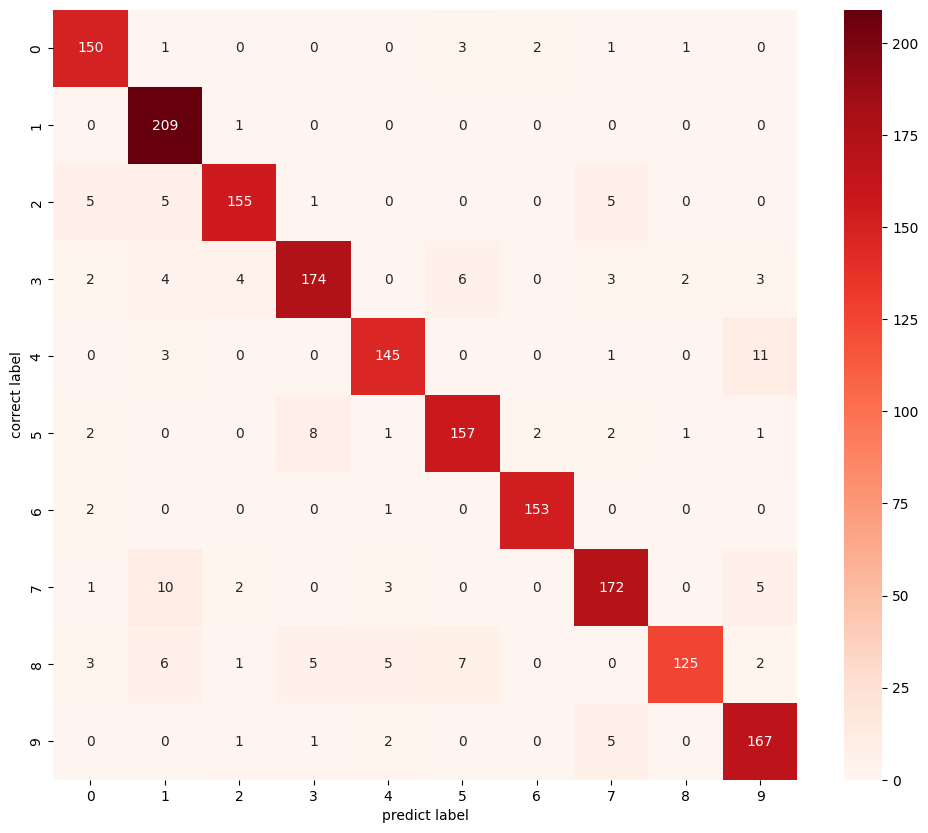

In [17]:
# 各数字の予測精度を確認
_p = predict_3_test.tolist()
for j in range(10):
    n = 0
    c = 0
    for i in range(len(_p)):
        if j == y_test[i]:
            n = n + 1
            if j == _p[i]:
                c = c + 1
    print(f'{j} : total {n} correct {c} precistion {c/n}')

# 混同行列を作成して、正解を横軸、予測を縦軸としてヒートマップを作成
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, _p) 
plt.figure(figsize = (12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Reds")
plt.ylabel('correct label')
plt.xlabel('predict label')
plt.show()

6 gt 7 -> predict 1
7 gt 4 -> predict 9
15 gt 3 -> predict 5
41 gt 3 -> predict 7
49 gt 2 -> predict 0
60 gt 3 -> predict 1
68 gt 9 -> predict 7
69 gt 7 -> predict 9
74 gt 3 -> predict 5
82 gt 0 -> predict 6
102 gt 7 -> predict 9
128 gt 4 -> predict 9
142 gt 3 -> predict 7
167 gt 2 -> predict 7
177 gt 8 -> predict 5
193 gt 3 -> predict 9
194 gt 7 -> predict 2
197 gt 3 -> predict 8
200 gt 5 -> predict 7
245 gt 2 -> predict 7
259 gt 5 -> predict 3
263 gt 3 -> predict 0
285 gt 8 -> predict 3
286 gt 7 -> predict 9
290 gt 2 -> predict 0
312 gt 6 -> predict 0
336 gt 2 -> predict 0
338 gt 8 -> predict 4
339 gt 3 -> predict 5
349 gt 7 -> predict 1
358 gt 5 -> predict 3
367 gt 3 -> predict 0
407 gt 8 -> predict 1
430 gt 4 -> predict 9
432 gt 5 -> predict 0
450 gt 9 -> predict 2
455 gt 9 -> predict 7
463 gt 7 -> predict 0
491 gt 2 -> predict 0
520 gt 8 -> predict 3
524 gt 8 -> predict 4
527 gt 0 -> predict 5
544 gt 6 -> predict 4
551 gt 6 -> predict 0
556 gt 9 -> predict 7
560 gt 7 -> predict 1


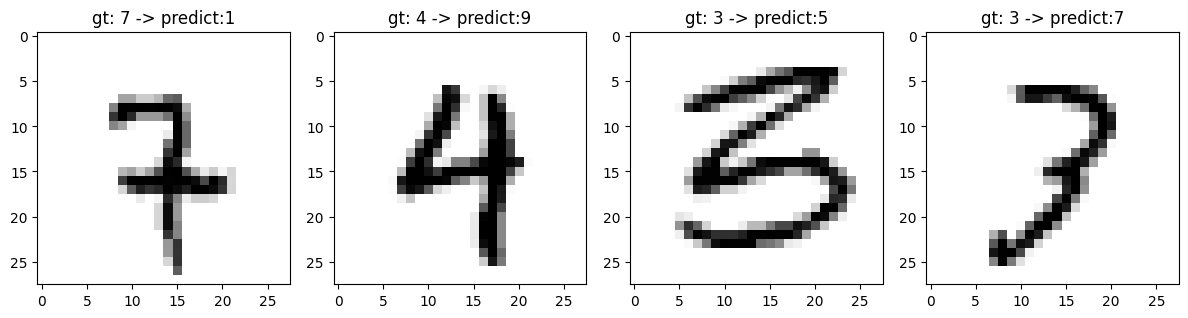

In [18]:
# 予測誤った画像のインデックスと正解と誤答を確認
for i in range(len(_p)):
    if _p[i] != y_test[i]:
        print(i, 'gt', y_test[i], '-> predict', _p[i])

# データセットに含まれる予測を誤った文字のイメージを表示 (5x2のレイアウトで)
img_no = [6, 7, 15, 41]
rows, cols = 1, 4
fig, ax = plt.subplots(rows, cols, figsize=(12.0, 3.0), tight_layout=True)
for i in range(len(img_no)):
    ax[i].imshow(x_test[img_no[i]].reshape(28,28), cmap="binary", interpolation="nearest")
    ax[i].set_title(f'gt: {y_test[img_no[i]]} -> predict:{_p[img_no[i]]}')
plt.show()

5250 1750 5250 1750
(5250, 784) (5250,)
k=1 (train) 正解率 1.0 (test) 正解率 0.9245714285714286
k=2 (train) 正解率 0.9676190476190476 (test) 正解率 0.916
k=3 (train) 正解率 0.9668571428571429 (test) 正解率 0.9182857142857143
k=4 (train) 正解率 0.9579047619047619 (test) 正解率 0.9177142857142857
k=5 (train) 正解率 0.9535238095238096 (test) 正解率 0.9211428571428572
k=6 (train) 正解率 0.9499047619047619 (test) 正解率 0.9222857142857143
k=7 (train) 正解率 0.9455238095238095 (test) 正解率 0.9142857142857143
k=8 (train) 正解率 0.9428571428571428 (test) 正解率 0.9188571428571428
k=9 (train) 正解率 0.9426666666666667 (test) 正解率 0.9131428571428571
k=10 (train) 正解率 0.9384761904761905 (test) 正解率 0.9165714285714286
k=11 (train) 正解率 0.9373333333333334 (test) 正解率 0.9125714285714286
k=12 (train) 正解率 0.9356190476190476 (test) 正解率 0.916
k=13 (train) 正解率 0.932952380952381 (test) 正解率 0.9108571428571428
k=14 (train) 正解率 0.9321904761904762 (test) 正解率 0.9108571428571428
k=15 (train) 正解率 0.932 (test) 正解率 0.9102857142857143


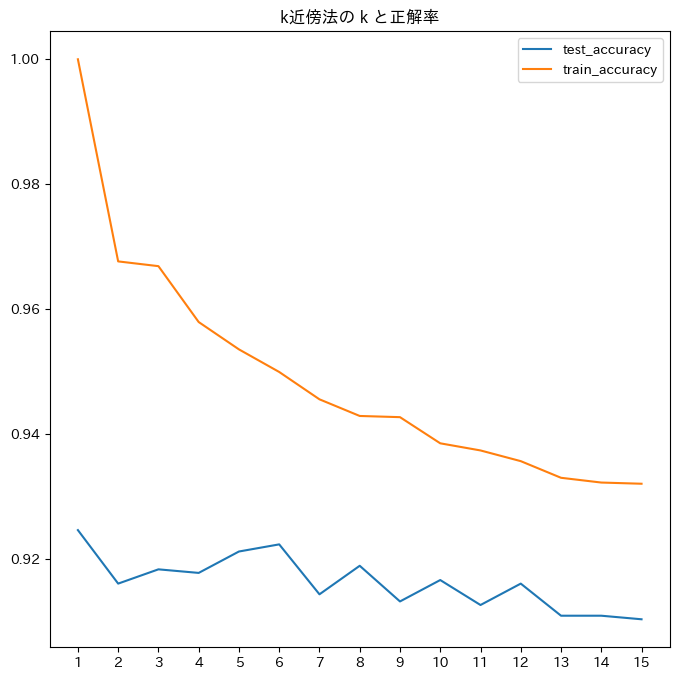

In [19]:
import statistics
import japanize_matplotlib

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
i = 0
k = []
test_accuracy = []
train_accuracy = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print(len(x_train), len(x_test), len(y_train), len(y_test))
print(x_train.shape, y_train.shape)

for _k in range(1, 16):
    # k近傍法で学習データを学習 (kは1-15まで設定)
    clf = KNeighborsClassifier(n_neighbors=_k, weights='uniform', algorithm='auto', p=2)
    clf = clf.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

    # 学習用データに対する正解率を計算
    predict_train = clf.predict(x_train)
    _train_accuracy = metrics.accuracy_score(y_train, predict_train)
    
    # 検証用データに対する正解率を計算
    predict_test = clf.predict(x_test)
    _test_accuracy = metrics.accuracy_score(y_test, predict_test)

    # 学習用データと検証用データにおける正解率を表示
    print(f'k={_k}', '(train) 正解率', _train_accuracy, '(test) 正解率', _test_accuracy)

    # kを変えた場合の学習用データと検証用データの正解率グラフのデータを準備
    k.append(_k)
    train_accuracy.append(_train_accuracy)
    test_accuracy.append(_test_accuracy)


# 各決定係数をヒストグラムに表示 (ビンの幅・数を揃えて、透過色で重ね合わせて表示)
ax.set_title(f'k近傍法の k と正解率')
ax.plot(k, test_accuracy, label='test_accuracy')
ax.plot(k, train_accuracy, label='train_accuracy')
ax.set_xticks(np.arange(1, 16, step=1))
ax.legend()  # loc='upper left'

plt.show()

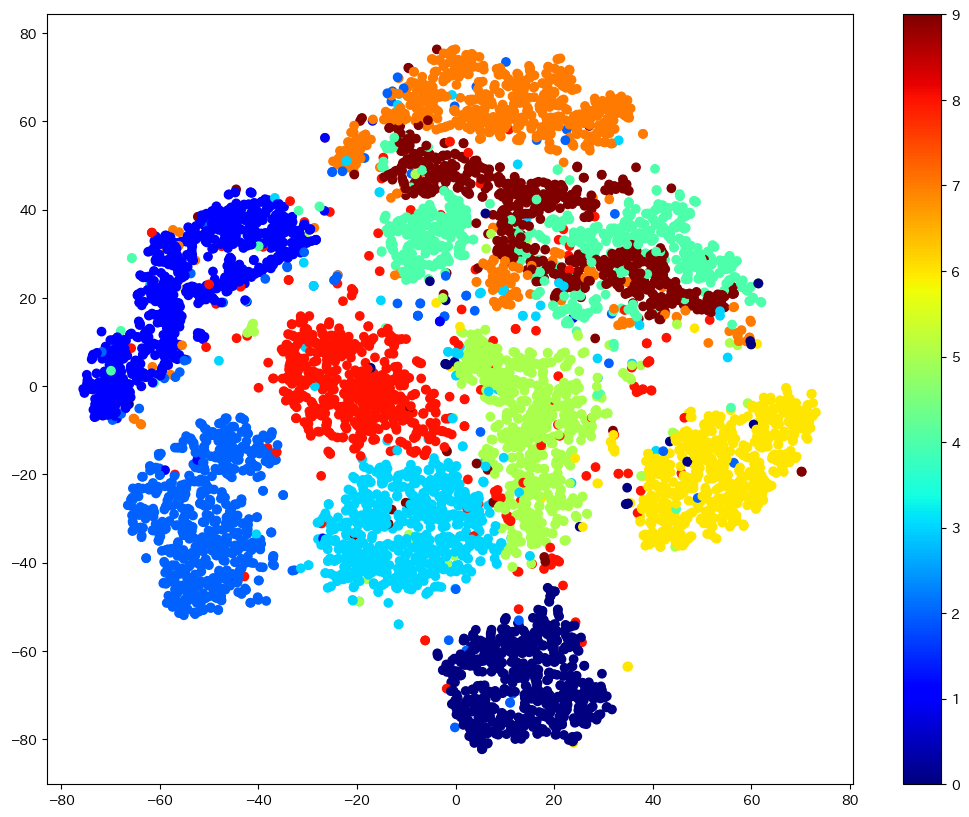

In [20]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', learning_rate='auto')
x_reduced  = tsne.fit_transform(x)

plt.figure(figsize=(13,10))
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y, cmap="jet")
plt.colorbar()
plt.show()
